float64
8


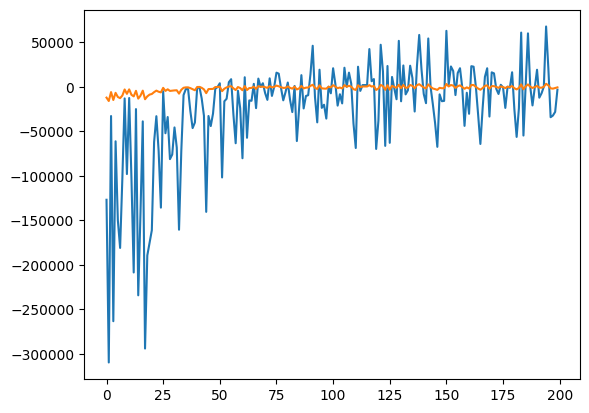

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import random
import numpy as np

df = pd.read_csv('window_heat.csv')
dT = df['dT[C]'].to_numpy()
Qdot = df['Qdot[W]'].to_numpy()
print(Qdot.dtype)

def mse_loss_update_wb(x, y, w, b, alpha):
    """
    Updates w and b in an attempt to reduce loss using SGD with a batch size of 1.
    MSE loss is used.
    x: feature (in this case, x=dT, the temperature difference). 
    y: label (in this case, Qdot).
    w: The current value of w before its update. 
    b: The current value of b before its update.
    alpha: the learning rate.|
    """
    j = random.randint(0, len(x) - 1)
    dl_dw = -2 * x[j] * (y[j] - (w * x[j] + b))
    dl_db = -2 * (y[j] - (w * x[j] + b))

    w = w - alpha*dl_dw
    b = b - alpha*dl_db

    return w, b, dl_dw, dl_db

w = 0.0
b = 0.0
alpha = 0.0001
epoch = 0
dw_vals = []
db_vals = []

for i in range(200):
    w, b, dw, db = mse_loss_update_wb(dT, Qdot, w, b, alpha)
    loss = mse_loss()
    epoch += 1
    dw_vals.append(dw)
    db_vals.append(db)


epoch //= len(Qdot) 
print(epoch)
#plt.plot(dT, Qdot, marker = 'o', ls='')
#plt.plot([0,25],[b,w*25+b])